In [22]:

import os,sys,platform
import numpy as np
!pip install numpy scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split 
print(os.getcwd())

#Import data and separate out
data = pd.read_csv(r"C:\Users\UW-User\Downloads\winequality-red.csv",sep=';')


#view data, get info about it, clean if necessary
data.info()
data.describe().T

C:\Users\UW-User
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [23]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

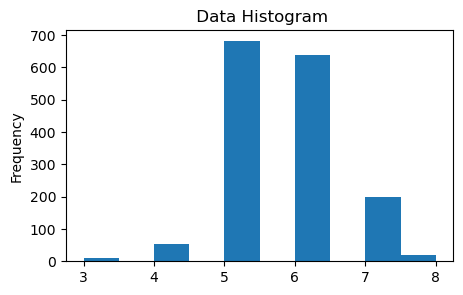

In [24]:
labels=data.pop("quality")
display(labels)
plot=labels.plot(kind='hist', title=" Data Histogram" , figsize=(5,3))

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score as r2 # used for LR
from sklearn.metrics import mean_squared_error as mse # used for LR
from sklearn.metrics import mean_absolute_error as mae # used for LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
trng_data, test_data , trng_lb, test_lb = train_test_split(data, labels, train_size=.25, shuffle=True,random_state=100)
object= StandardScaler()
scale_tr= object.fit_transform(trng_data)
scale_te= object.fit_transform(test_data)


In [26]:
#Initialization of different regression models
linear_reg= LinearRegression()
random_forest= RandomForestRegressor()
ridge_reg= Ridge(alpha=1)
lasso_reg= Lasso(alpha=1)
linear_reg.fit(scale_tr, trng_lb)
random_forest.fit(scale_tr, trng_lb)
ridge_reg.fit(scale_tr, trng_lb)
lasso_reg.fit(scale_tr, trng_lb)

# Predictions of test data
x1_pred= linear_reg.predict(scale_te)
x2_pred= random_forest.predict(scale_te)
x3_pred= ridge_reg.predict(scale_te)
x4_pred= lasso_reg.predict(scale_te)

# Test model accuracy with MSE
mse_linear= mse(test_lb, x1_pred)
mse_randomforest= mse(test_lb, x2_pred)
mse_ridge= mse(test_lb, x3_pred)
mse_lasso=mse(test_lb, x4_pred)

#Test model accuracy with MAE
mae_linear= mae(test_lb, x1_pred)
mae_randomforest= mae(test_lb, x2_pred)
mae_ridge= mae(test_lb, x3_pred)
mae_lasso= mae(test_lb, x4_pred)

#Test model with RMSE
rmse_linear= np.sqrt(mse_linear)
rmse_randomforest= np.sqrt(mse_randomforest)
rmse_ridge= np. sqrt(mse_ridge)
rmse_lasso= np.sqrt(mse_lasso)

#Test model with R2 score
r2_linear= r2(test_lb, x1_pred)
r2_randomforest= r2(test_lb, x2_pred)
r2_ridge= r2(test_lb, x3_pred)
r2_lasso= r2(test_lb, x4_pred)

In [27]:
# Printing the accuracy of different models
data = {
    "Model": ["Linear", "Random Forest", "Ridge", "Lasso"],
    "MSE": [mse_linear, mse_randomforest, mse_ridge, mse_lasso],
    "MAE": [mae_linear, mae_randomforest, mae_ridge, mae_lasso],
    "RMSE": [rmse_linear, rmse_randomforest, rmse_ridge, rmse_lasso],
    "R2 Score": [r2_linear, r2_randomforest, r2_ridge, r2_lasso]
}
df_metrics = pd.DataFrame(data)
print(df_metrics)

           Model       MSE       MAE      RMSE  R2 Score
0         Linear  0.426070  0.499928  0.652740  0.344675
1  Random Forest  0.403527  0.494750  0.635237  0.379348
2          Ridge  0.425967  0.499919  0.652662  0.344833
3          Lasso  0.650538  0.683991  0.806559 -0.000572


In [28]:
#classification by RandomForest

RF = RandomForestClassifier()
RF.fit(trng_data, trng_lb)
RF_pred = RF.predict(test_data)
train_lb_pred = RF.predict(trng_data)
accuracy_train= accuracy_score(trng_lb, train_lb_pred)
accuracy_test=accuracy_score(test_lb,RF_pred)
print("Accuracy for Train Data:", accuracy_train)
print("Accuracy for test Data:" , accuracy_test)

Accuracy for Train Data: 1.0
Accuracy for test Data: 0.575


In [29]:
#Classification using DecisionTree

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(trng_data, trng_lb)
DT_pred = DT.predict(test_data)
DT_train_pred = DT.predict(trng_data)
accuracy_train= accuracy_score(trng_lb, DT_train_pred)
accuracy_test= accuracy_score(test_lb, DT_pred)
print("Accuracy for Train Data:", accuracy_train)
print("Accuracy for test Data:" , accuracy_test)

Accuracy for Train Data: 1.0
Accuracy for test Data: 0.48333333333333334


In [30]:
#classification using Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(trng_data, trng_lb)
LR_pred = LR.predict(test_data)
LR_train_pred = LR.predict(trng_data)
accuracy_train= accuracy_score(trng_lb, LR_train_pred)
accuracy_test= accuracy_score(test_lb, LR_pred)
print("Accuracy for Train Data:", accuracy_train)
print("Accuracy for test Data:" , accuracy_test)

Accuracy for Train Data: 0.5664160401002506
Accuracy for test Data: 0.595


C:\Users\UW-User\Downloads\Bimal\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
